In [ ]:
!git clone https://github.com/ultralytics/yolov3  # clone
%cd yolov3
%pip install -qr requirements.txt  # install

import torch
from yolov3 import utils
display = utils.notebook_init()  # checks

YOLOv3 🚀 v9.6.0-5-g9d0e1cf torch 1.10.0+cu111 CPU


Setup complete ✅


Test pour voir si on a bien chargé le réseau 

detect: weights=['yolov3.pt'], source=data/images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-5-g9d0e1cf torch 1.10.0+cu111 CPU

100% 119M/119M [00:01<00:00, 101MB/s]

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 156.1 GFLOPs
image 1/2 /content/yolov3/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1 tie, 1 sports ball, Done. (2.403s)
image 2/2 /content/yolov3/yolov3/data/images/zidane.jpg: 384x640 2 persons, 3 ties, Done. (1.827s)
Speed: 2.3ms pre-process, 2115.1ms inference, 8.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


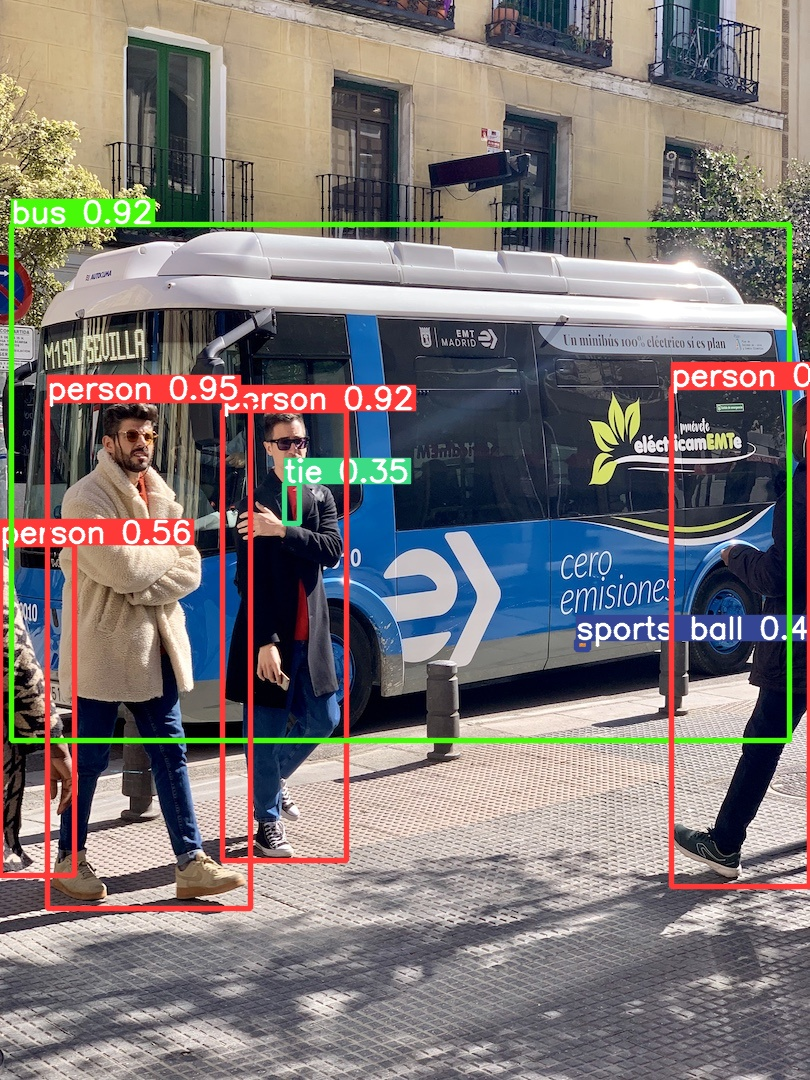

In [ ]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp/bus.jpg', width=600)

Entrainement du modele avec SGD, batch 32 epoch 10 sur VOC 2007+2012

In [ ]:
!python train.py --img 416 --batch 32 --epochs 10 --data voc.yaml --weights yolov3.pt

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose 'Don't visualize my results'
train: weights=yolov3.pt, cfg=, data=voc.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=10, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.6.0-5-g9d0e1cf torch 1.10.0+cu111 CPU

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=

Validation 

In [ ]:
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip

  0%|          | 0.00/780M [00:00<?, ?B/s]

--img 640

In [ ]:
# Run YOLOv3 on VOC val
!python val.py --weights '/content/yolov3/runs/train/exp3/weights/best.pt' --data voc.yaml --img 416 --iou 0.65 --half

val: data=/content/yolov3/data/voc.yaml, weights=['/content/yolov3/runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.65, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv3 🚀 v9.6.0-5-g9d0e1cf torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 261 layers, 61599745 parameters, 0 gradients, 155.0 GFLOPs
val: Scanning '../datasets/VOC/labels/test2007.cache' images and labels... 4952 found, 0 missing, 0 empty, 0 corrupted: 100% 4952/4952 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 155/155 [02:48<00:00,  1.09s/it]
                 all       4952      12032      0.803      0.757      0.834      0.573
           aeroplane       4952        285      0.844      0.818      0.892      0.587
             bicy

In [ ]:
python val.py --weights '/content/yolov3/runs/train/exp/weights/best.pt' --data voc.yaml --img 416 --iou 0.65 --half